# Module 7 Activity: Classification

In this module, we will be focusing on a simple classification problem. We will be looking at [Kickstarter Data](https://www.kaggle.com/kemical/kickstarter-projects) and attempting to classify projects as successful or failed based on the different attributes of each project, such as the monetary goal, the amount pledged, the number of backers, etc.

This is a problem of binary classification, where there are two possible outcomes - success or failure.

Campaign length is a good predictor of success

In [1]:
# dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's explore our data a little bit. We'll load it in the cell below.

In [2]:
ks = pd.read_csv('ks_2020.csv')
print(ks.shape)
ks.head()

(261358, 11)


,name,main_category,currency,deadline,goal,launched,state,backers,country,usd_goal_real,duration
0,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2017-09-02,failed,15,US,30000.0,60
1,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,2013-01-12,failed,3,US,45000.0,45
2,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,2012-03-17,failed,1,US,5000.0,30
3,Monarch Espresso Bar,Food,USD,2016-04-01,50000.0,2016-02-26,successful,224,US,50000.0,35
4,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,2014-12-21,1000.0,2014-12-01,successful,16,US,1000.0,20


For a classification model, we want to be able to test our model on data that it hasn't seen before. If we try to test it on a point that it already knows the answer for, it'll be correct 100% of the time! For this reason, we split up our data into a training set and a test set. The cell below accomplishes this - it sets aside 10% of the data for testing.

In [3]:
train, test = train_test_split(ks, test_size = 0.1, random_state = 42)

In [4]:
train.head()

,name,main_category,currency,deadline,goal,launched,state,backers,country,usd_goal_real,duration
245004,KILLER GRANNY: based on our award-winning script,Film & Video,USD,2011-08-21,9900.0,2011-07-22,successful,77,US,9900.0,30
178122,"A Facelift for the Facade--Spring Garden Mill,...",Theater,USD,2016-02-20,2000.0,2016-01-30,failed,19,US,2000.0,21
115199,The Peter Pomperfield Book Series,Publishing,USD,2014-08-31,1500.0,2014-08-10,failed,1,US,1500.0,21
94607,Blender Jar for Blendtec with Replaceable Blad...,Design,USD,2015-04-20,25000.0,2015-03-21,failed,2,US,25000.0,30
234415,"Lobo, the Deadliest Assassin",Comics,USD,2015-10-27,10000.0,2015-09-22,failed,2,US,10000.0,35


In this module, we'll be implementing a k-nearest neighbors classifier. The idea behind this type of classifier is to look at the k points closest to our point of interest, and classify our point as whatever category the majority of surrounding points are. For example, look at the image of the plot below. The green point has a single nearest neighbor, which is a Sycamore. In our case, we're looking to see if we can draw a line to classify kickstarter projects as successful or failed.

<p><a href="https://otd.gitbook.io/book/module-7/nearest-neighbors"><img src="knn.PNG"></a></p>

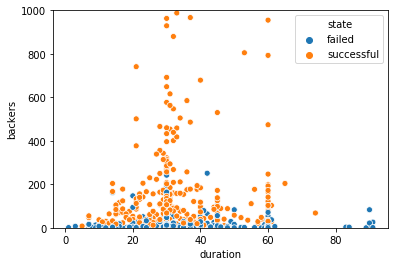

In [5]:
# eda
samp = ks.sample(1000)
sns.scatterplot('duration', 'backers', hue = 'state', data = samp);
plt.ylim(0, 1000);

K-nearest neighbors (KNN) classification works on distances between points, so we'll create a function that tells us the distance between a set of points.

In [6]:
def distance(features_array_1, features_array_2):
    return np.sqrt(np.sum((features_array_1 - features_array_2)**2))